<a href="https://colab.research.google.com/github/tcruz88/CNN_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
!unzip pedestrian.zip
!unzip road.zip

Archive:  pedestrian.zip
replace pedestrian/download (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: pedestrian/download (1).jpg  
  inflating: pedestrian/download (18).jpg  
  inflating: pedestrian/download (2).jpg  
  inflating: pedestrian/download (3).jpg  
  inflating: pedestrian/download (4).jpg  
  inflating: pedestrian/download (5).jpg  
  inflating: pedestrian/download (6).jpg  
  inflating: pedestrian/download (7).jpg  
  inflating: pedestrian/download (8).jpg  
  inflating: pedestrian/download (9).jpg  
  inflating: pedestrian/download.jpg  
  inflating: pedestrian/images (1).jpg  
  inflating: pedestrian/images (10).jpg  
  inflating: pedestrian/images (11).jpg  
  inflating: pedestrian/images (12).jpg  
  inflating: pedestrian/images (13).jpg  
  inflating: pedestrian/images (14).jpg  
  inflating: pedestrian/images (15).jpg  
  inflating: pedestrian/images (16).jpg  
  inflating: pedestrian/images (17).jpg  
  inflating: pedestrian/images (18).jpg  
  inflati

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


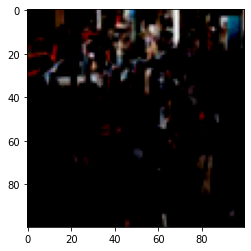

[1. 0.]


In [3]:
#image data shape (n, width, height, rgb value)

X = [] # Images
Y = [] # Categories

folder_pedestrian = 'pedestrian'
folder_road = 'road'

name_encode = {"pedestrian":0, "road":1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))  #loading image
        resized_image = Image.Image.resize(loaded_image, [100,100]) #resize image to 100 x 100 px
        image_array = np.array(resized_image) # transform image into an array
        X.append(image_array) # append images to array X
        Y.append(name_encode[name]) #append category

        image_flipped = cv2.flip(image_array,1) #create copies of images flipped horizontally to improve model accuracy
        X.append(image_flipped)
        Y.append(name_encode[name])

        image_blurred = cv2.blur(image_array,(2,2)) #create copies of images blurred to improve accuracy
        X.append(image_blurred)
        Y.append(name_encode[name])

        image_flipped_blurred = cv2.blur(image_flipped,(2,2)) #create copies of images flipped horizontally & blurred to improve accuracy
        X.append(image_flipped_blurred)
        Y.append(name_encode[name])

def show_image(index):
    plt.imshow(X[index])
    plt.show()
    print(Y[index])

images_to_array(folder_pedestrian, "pedestrian")
images_to_array(folder_road, "road")

Y = to_categorical(Y, num_classes=2)
X = (np.array(X) - 127.5) / 127.5

show_image(6)

In [4]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (5,5), padding='same',activation='relu', input_shape=(100,100,3) ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) # muting half of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       80100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 100)       400       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 100)       0

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X[2])

[[[-0.89803922 -0.89019608 -0.8745098 ]
  [-0.89803922 -0.89019608 -0.8745098 ]
  [-0.78823529 -0.77254902 -0.76470588]
  ...
  [-0.36470588 -0.27843137 -0.24705882]
  [-0.50588235 -0.42745098 -0.39607843]
  [-0.52156863 -0.45882353 -0.41960784]]

 [[-0.89803922 -0.89019608 -0.8745098 ]
  [-0.89803922 -0.89019608 -0.8745098 ]
  [-0.78823529 -0.77254902 -0.76470588]
  ...
  [-0.36470588 -0.27843137 -0.24705882]
  [-0.50588235 -0.42745098 -0.39607843]
  [-0.52156863 -0.45882353 -0.41960784]]

 [[-0.81176471 -0.80392157 -0.76470588]
  [-0.81176471 -0.80392157 -0.76470588]
  [-0.76470588 -0.75686275 -0.7254902 ]
  ...
  [-0.44313725 -0.35686275 -0.3254902 ]
  [-0.50588235 -0.42745098 -0.38823529]
  [-0.40392157 -0.3254902  -0.29411765]]

 ...

 [[-0.42745098 -0.34901961 -0.34901961]
  [-0.42745098 -0.34901961 -0.34901961]
  [-0.42745098 -0.37254902 -0.37254902]
  ...
  [-0.57647059 -0.52941176 -0.49803922]
  [-0.49803922 -0.43529412 -0.41176471]
  [-0.3254902  -0.28627451 -0.28627451]]

 [

Epoch 1/10
36/36 [==============================] - 27s 727ms/step - loss: 2.3156 - acc: 0.8424 - val_loss: 5.3320 - val_acc: 0.4000
Epoch 2/10
36/36 [==============================] - 26s 712ms/step - loss: 0.9080 - acc: 0.9319 - val_loss: 11.5799 - val_acc: 0.4000
Epoch 3/10
36/36 [==============================] - 26s 710ms/step - loss: 0.0072 - acc: 0.9970 - val_loss: 10.1835 - val_acc: 0.4000
Epoch 4/10
36/36 [==============================] - 26s 710ms/step - loss: 0.0147 - acc: 0.9967 - val_loss: 12.0747 - val_acc: 0.4000
Epoch 5/10
36/36 [==============================] - 26s 710ms/step - loss: 0.3292 - acc: 0.9567 - val_loss: 12.1320 - val_acc: 0.5000
Epoch 6/10
36/36 [==============================] - 26s 716ms/step - loss: 0.0321 - acc: 0.9964 - val_loss: 12.5755 - val_acc: 0.5500
Epoch 7/10
36/36 [==============================] - 26s 713ms/step - loss: 0.0533 - acc: 0.9879 - val_loss: 5.7900 - val_acc: 0.6250
Epoch 8/10
36/36 [==============================] - 26s 713ms/st

No handles with labels found to put in legend.


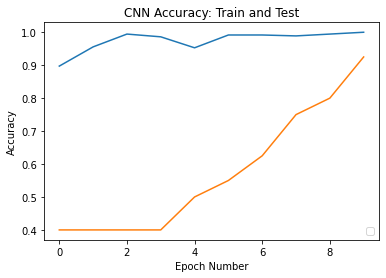

In [6]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
h = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test,y_test))
model.save('road_pedestrian_CNN.h5')

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title("CNN Accuracy: Train and Test")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
